In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
df= pd.read_csv("Data.csv", encoding="unicode_escape")

In [11]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [21]:
df.drop(['Status',"unnamed1"], axis=1,inplace=True)

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [25]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [37]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

User_ID
[1002903 1000732 1001990 ... 1001542 1004378 1005258]
--------------------------------------------------
Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
--------------------------------------------------
Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
--------------------------------------------------
Gender
['F' 'M']
--------------------------------------------------
Age Group
['26-35' '0-17' '18-25' '51-55' '46-50' '55+' '36-45']
--------------------------------------------------
Age
[28 35 16 25 26 34 20 24 29 54 19 46 30 53 83 33 40 39 32 36 55 27 72 45
 43 47 22 52 18 21 38 37 23 49 42 50 48 31 44 41 66 15 51 77 87 79 71 88
 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 61 91 85
 70 80 65 74 69 78 57 60 59]
--------------------------------------------------
Marital_Status
[0 1]
--------------------------------------------------
State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Ka

In [38]:
df['Amount']=df['Amount'].astype(int)

# Gender

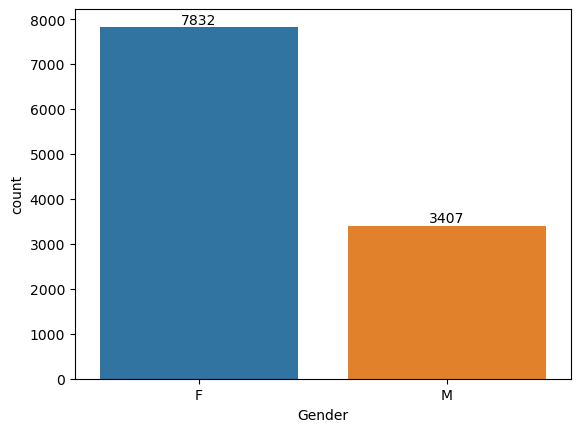

In [41]:
# Gender
ax= sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [53]:
genderwise=df.groupby(['Gender'], as_index= False)[['Amount']].sum().sort_values(by='Amount',ascending=False)
genderwise

,Gender,Amount
0,F,74335853
1,M,31913276


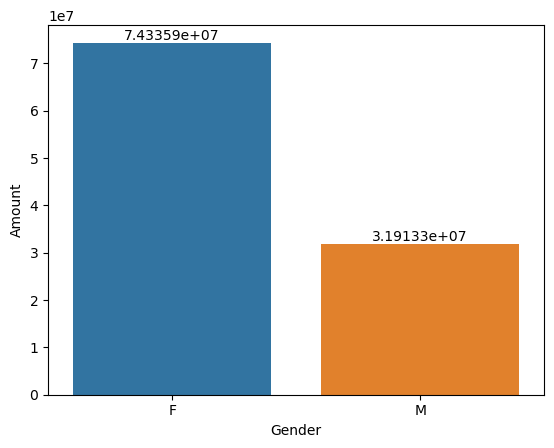

In [56]:
ax1=sns.barplot(x='Gender',y='Amount',data=genderwise)
for bars in ax1.containers:
        ax1.bar_label(bars)

From above graph we have seen that most of the buyers are female also the purchasing amount of female is higher than man.

# Age Group

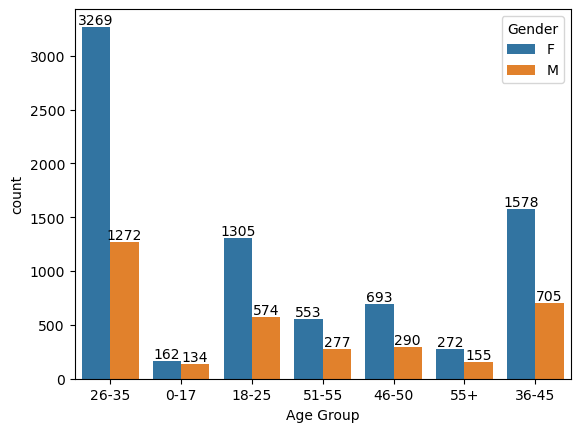

In [73]:
ax= sns.countplot(x='Age Group', hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [71]:
df['Age Group'].value_counts(normalize=True)

26-35    0.404040
36-45    0.203132
18-25    0.167186
46-50    0.087463
51-55    0.073850
55+      0.037993
0-17     0.026337
Name: Age Group, dtype: float64

<Axes: xlabel='Age Group', ylabel='Amount'>

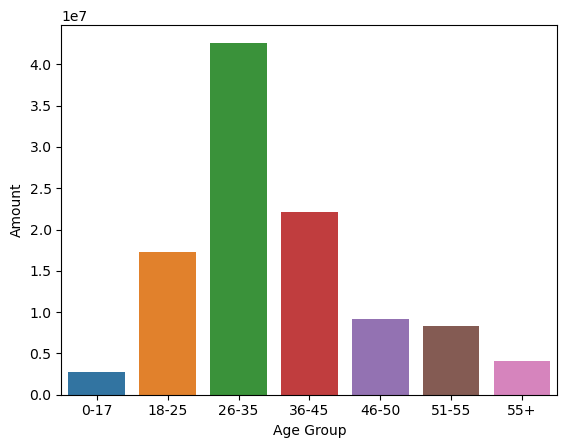

In [75]:
agewise= df.groupby(['Age Group'],as_index=False)[['Amount']].sum()
sns.barplot(x='Age Group', y='Amount', data=agewise)

From the above graph we are seen that most of the buyers are 26-35 years old female

# State

<Axes: xlabel='State', ylabel='Orders'>

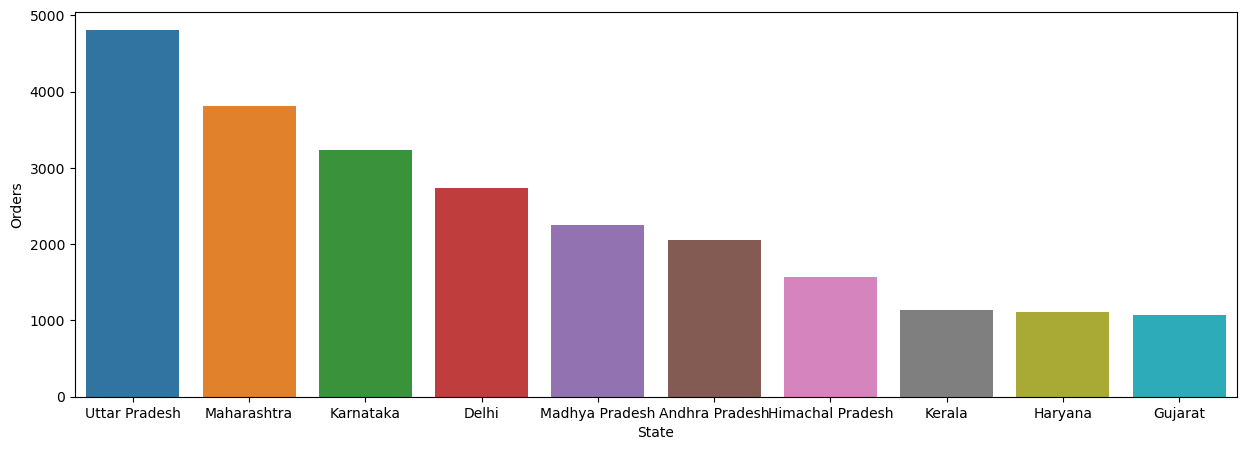

In [96]:
statewiseorder=df.groupby(['State'], as_index=False)[['Orders']].sum().sort_values(by='Orders', ascending=False)[:10]
plt.figure(figsize=(15,5))
sns.barplot(x='State',y='Orders',data=statewiseorder)

<Axes: xlabel='State', ylabel='Amount'>

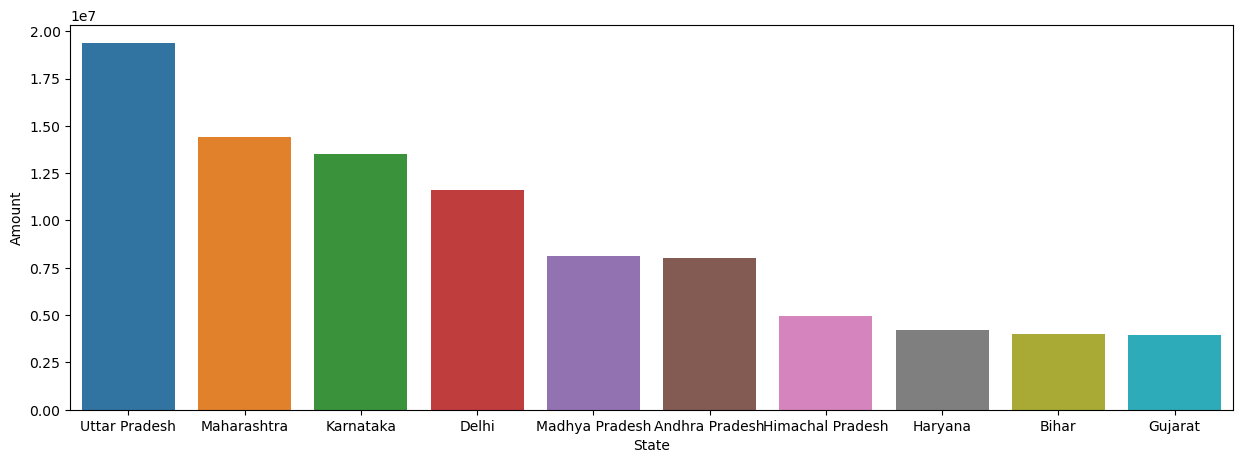

In [95]:
statewiseamount=df.groupby(['State'], as_index=False)[['Amount']].sum().sort_values(by='Amount', ascending=False)[:10]
plt.figure(figsize=(15,5))
sns.barplot(x='State',y='Amount',data=statewiseamount)

Most of the orders/ Amount are from Uttar Prades, Maharashtra, Karnataka respectively.

# Marital status

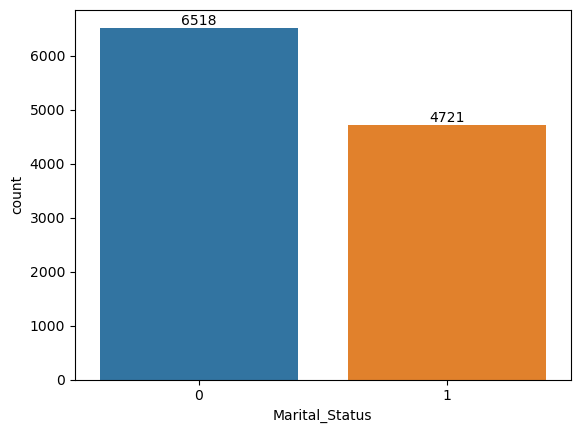

In [98]:
ax= sns.countplot(x='Marital_Status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

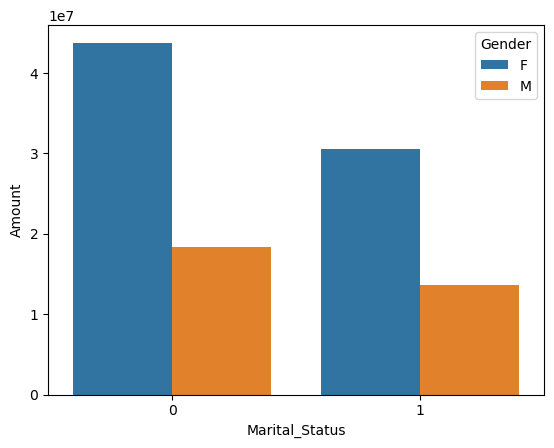

In [114]:
Marriedwiseamount=df.groupby(['Marital_Status','Gender'], as_index=False)[['Amount']].sum().sort_values(by='Amount', ascending=False)[:10]
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=Marriedwiseamount)

From the above graphs we have seen that most of the buyers are unmarried Female.

# Occupation

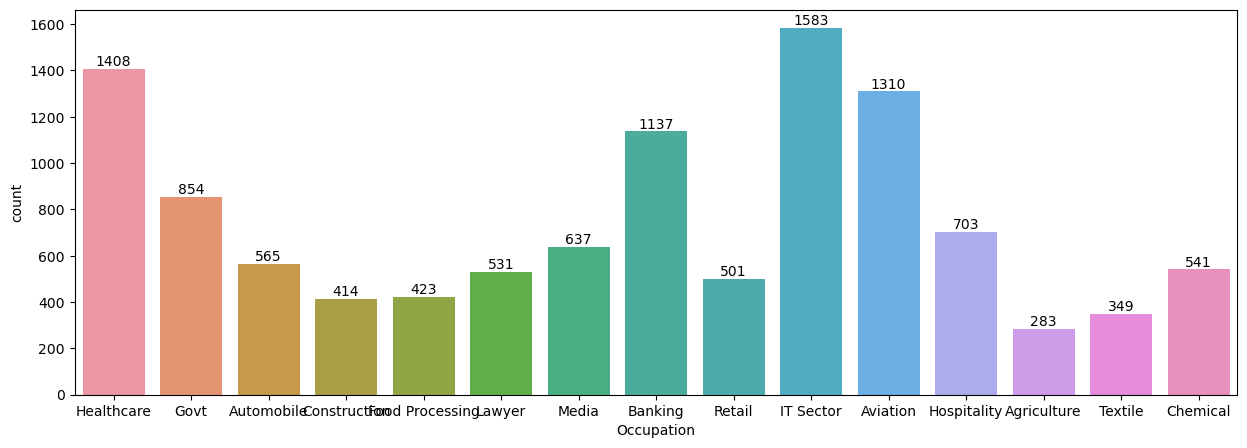

In [121]:
plt.figure(figsize=(15,5))
ax= sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

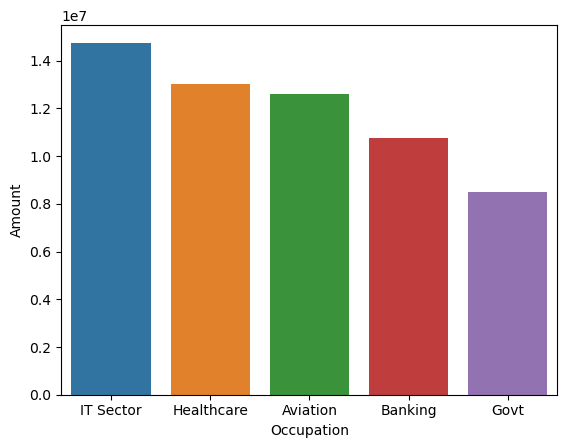

In [119]:
jobwise= df.groupby(['Occupation'], as_index=False)[['Amount']].sum().sort_values(by='Amount',ascending=False).head(5)
sns.barplot(x='Occupation',y='Amount', data=jobwise)

Most of the buyers are form IT sector, Healthcare and Aviation occupation respectively.

# Product Catagory

<Axes: xlabel='Product_Category', ylabel='Amount'>

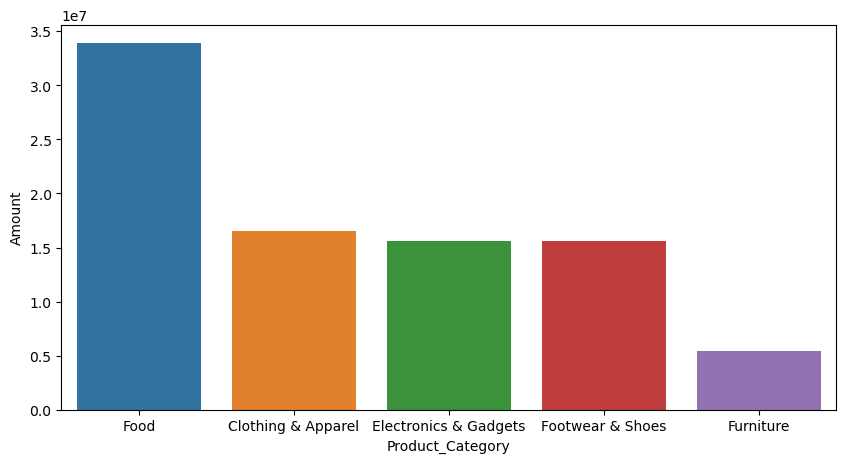

In [135]:
catwise= df.groupby(['Product_Category'], as_index=False)[['Amount']].sum().sort_values(by='Amount',ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Category',y='Amount', data=catwise)

<Axes: xlabel='Product_Category', ylabel='Orders'>

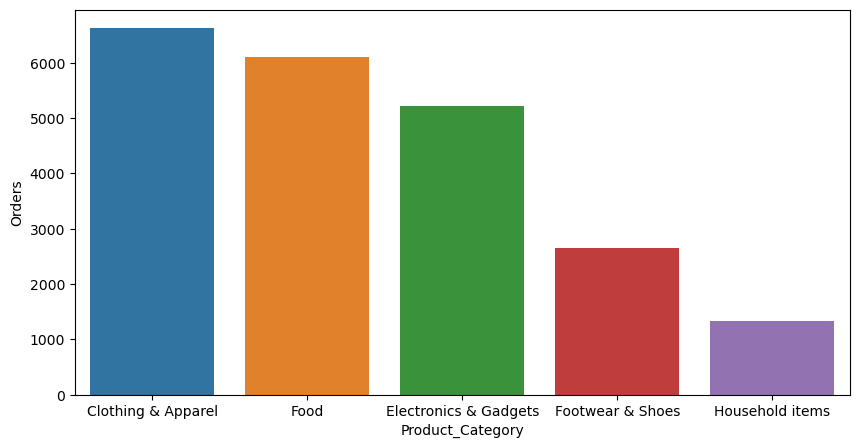

In [136]:
catwise1= df.groupby(['Product_Category'], as_index=False)[['Orders']].sum().sort_values(by='Orders',ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Category',y='Orders', data=catwise1)

Though maximum order is from Clothing & Apparel but maximum amount is from Food then Clothing & Apparel and Electronics & Gadget respectively. 

Most orders product

<Axes: xlabel='Product_ID', ylabel='Orders'>

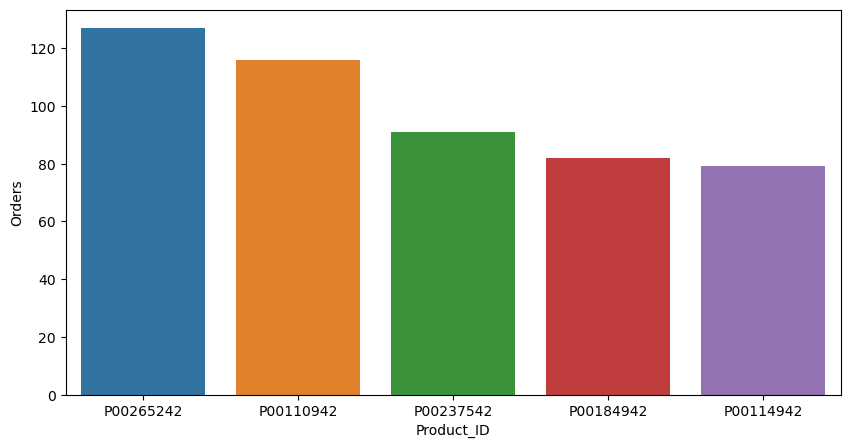

In [138]:
item= df.groupby(['Product_ID'], as_index=False)[['Orders']].sum().sort_values(by='Orders',ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x='Product_ID',y='Orders', data=item)

([<matplotlib.patches.Wedge at 0x1d6cb1a0490>,
 [Text(0.3997343101055941, 1.0247987516212171, 'Central'),
  Text(-1.0999559930633214, -0.009839376203942356, 'Southern'),
  Text(-0.28645756144199336, -1.062046169190731, 'Western'),
  Text(0.707759933373368, -0.8420664324810282, 'Northern'),
  Text(1.0716482375803822, -0.24813313944505885, 'Eastern')],
 [Text(0.21803689642123314, 0.5589811372479365, '38.16'),
  Text(-0.599975996216357, -0.005366932474877649, '23.96'),
  Text(-0.15624957896835998, -0.5792979104676713, '17.37'),
  Text(0.38605087274910976, -0.45930896317146985, '13.27'),
  Text(0.5845354023165721, -0.13534534878821392, '7.24')])

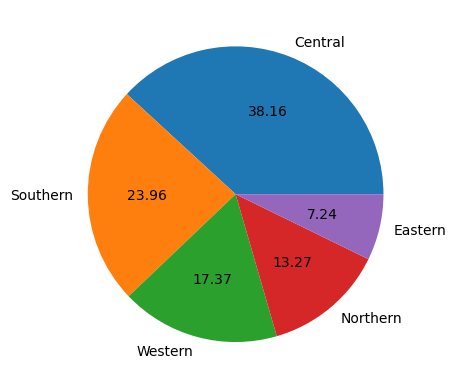

In [144]:
state= df['Zone']. value_counts(normalize=True)
plt.pie(state,labels=state.index, autopct="%.2f")

One-third of the order is from Central Zone 

# Conclusion

Unmarried women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.